In [1]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries

import matplotlib as mpl
import missingno as msnos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

# Predictive Analytics models
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import train_test_split
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, ensemble, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import sklearn.metrics

#imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#ACP

import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn import preprocessing
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# chemenin d'accès
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
os.listdir

<function posix.listdir(path=None)>

In [4]:
os.listdir("/gdrive/MyDrive/Colab Notebooks/Projet_3")

['2016_Building_Energy_Benchmarking.csv',
 'AMOUSSOU_Samson_3_Presentation_12112023.pptx',
 'data_sep.csv',
 'AMOUSSOU_Samson_1_notebook_exploratoire_18092023.ipynb',
 'AMOUSSOU_Samson_2_notebook_prediction_17102023.ipynb']

In [5]:
data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Projet_3/data_sep.csv', sep=',')

In [6]:
data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuiltInterval,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,ENERGYSTARScore,TotalGHGEmissions_log,SiteEnergyUse_log,Ratio_Electricite,Ratio_Gaz,Ratio_Vapeur,Ratio_Parking,Ratio_LargestPropertyUseTypeGFA,Ratio_SecondLargestPropertyUseTypeGFA,Set
0,734,NonResidential,Small- and Mid-Sized Office,6,BALLARD,"(1992.0, 2015.0]",1.0,4,92092,21055,...,5.0,3.543275,15.387675,1.00000,0.00000,0.0,0.228630,0.760913,0.000000,1
1,780,NonResidential,Large Office,2,DOWNTOWN,"(1992.0, 2015.0]",1.0,8,446261,124788,...,96.0,4.560068,16.423236,1.00000,0.00000,0.0,0.279630,0.769505,0.255987,1
2,24822,NonResidential,Small- and Mid-Sized Office,2,GREATER DUWAMISH,"(1899.885, 1923.0]",0.0,3,49052,0,...,96.0,2.402430,14.181158,1.00000,0.00000,0.0,0.000000,0.660381,0.205027,1
3,26396,NonResidential,Worship Facility,4,NORTHEAST,"(1923.0, 1946.0]",1.0,2,78401,0,...,NaN,4.481985,14.716651,0.38173,0.61827,0.0,0.000000,0.795908,0.126784,1
4,27587,NonResidential,Small- and Mid-Sized Office,5,NORTHWEST,"(1969.0, 1992.0]",1.0,3,24696,6300,...,87.0,1.677097,13.344109,1.00000,0.00000,0.0,0.255102,0.744898,0.255102,1


In [7]:
data.shape

(1542, 27)

In [8]:
data_ML = data.copy()

In [9]:
data_ML.dtypes

OSEBuildingID                              int64
BuildingType                              object
PrimaryPropertyType                       object
CouncilDistrictCode                        int64
Neighborhood                              object
YearBuiltInterval                         object
NumberofBuildings                        float64
NumberofFloors                             int64
PropertyGFATotal                           int64
PropertyGFAParking                         int64
PropertyGFABuilding(s)                     int64
LargestPropertyUseType                    object
LargestPropertyUseTypeGFA                float64
SecondLargestPropertyUseType              object
SecondLargestPropertyUseTypeGFA          float64
ThirdLargestPropertyUseType               object
ThirdLargestPropertyUseTypeGFA           float64
ENERGYSTARScore                          float64
TotalGHGEmissions_log                    float64
SiteEnergyUse_log                        float64
Ratio_Electricite   

- Prétraitement

--- Base de données sans ENERGYSTARScore

In [10]:
data_ML = data_ML.drop(columns = "ENERGYSTARScore")
data_ML.dropna(how = 'any', inplace=True)

In [11]:
categorical = data_ML.select_dtypes(exclude = "number").columns.tolist()
numerical = data_ML.select_dtypes(include = "number").columns.tolist()

#Suppression des target
numerical.remove("SiteEnergyUse_log")
numerical.remove("TotalGHGEmissions_log")

- Séparation en train et test set


In [12]:
seed = 42  # La même graine aléatoire pour la reproductibilité

# Target consommation totale en énergie
X_CE_train = data_ML[data_ML['Set'] == 1].drop(columns=["SiteEnergyUse_log", "TotalGHGEmissions_log"])
y_CE_train = data_ML[data_ML['Set'] == 1]["SiteEnergyUse_log"]
X_CE_test = data_ML[data_ML['Set'] == 0].drop(columns=["SiteEnergyUse_log", "TotalGHGEmissions_log"])
y_CE_test = data_ML[data_ML['Set'] == 0]["SiteEnergyUse_log"]

# Target émissions de CO2
X_Co2_train = data_ML[data_ML['Set'] == 1].drop(columns=["TotalGHGEmissions_log", "SiteEnergyUse_log"])
y_Co2_train = data_ML[data_ML['Set'] == 1]["TotalGHGEmissions_log"]
X_Co2_test = data_ML[data_ML['Set'] == 0].drop(columns=["TotalGHGEmissions_log", "SiteEnergyUse_log"])
y_Co2_test = data_ML[data_ML['Set'] == 0]["TotalGHGEmissions_log"]

- Entrainement CE et Co2

In [13]:
print("Entrainement CE :  {} lignes,\n Test: {} lignes.\n".format(X_CE_train.shape[0],
                                                            X_CE_test.shape[0]))

print("Entrainement Co2 : {} lignes,\nTest: {} lignes.\n".format(X_Co2_train.shape[0],
                                                           X_Co2_test.shape[0]))

Entrainement CE :  1233 lignes,
 Test: 309 lignes.

Entrainement Co2 : 1233 lignes,
Test: 309 lignes.



- Standardisation et encodage

In [14]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [15]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import RobustScaler

encoder = TargetEncoder()
scaler = RobustScaler()

- Encodage

Pour X_CE :



In [16]:
# Utilisation de fit_transform sur l'ensemble d'entraînement
X_CE_train[categorical] = encoder.fit_transform(X_CE_train[categorical], y_CE_train)

# Utilisation de transform sur l'ensemble de test en utilisant le même encodeur
X_CE_test[categorical] = encoder.transform(X_CE_test[categorical], y_CE_test)

Pour X_Co2 :



In [17]:
# Utilisation de fit_transform sur l'ensemble d'entraînement
X_Co2_train[categorical] = encoder.fit_transform(X_Co2_train[categorical], y_Co2_train)

# Utilisation de transform sur l'ensemble de test en utilisant le même encodeur
X_Co2_test[categorical] = encoder.transform(X_Co2_test[categorical], y_Co2_test)

- Standardisation


Pour X_CE :


In [18]:
X_CE_train[numerical] = scaler.fit_transform(X_CE_train[numerical])

X_CE_test[numerical] = scaler.transform(X_CE_test[numerical])

Pour X_Co2 :


In [19]:
X_Co2_train[numerical] = scaler.fit_transform(X_Co2_train[numerical])

X_Co2_test[numerical] = scaler.transform(X_Co2_test[numerical])

- Choix de la métrique

Nous utilisons plusieurs métriques pour évaluer nos modèles de régression, chacune avec ses avantages :

**MAE** (Erreur Absolue Moyenne) : Cette métrique évalue l'ampleur des erreurs, idéale pour prendre en compte les valeurs aberrantes.

**R²** (Coefficient de Détermination) : Mesure la performance du modèle par rapport à la variation des données, une valeur proche de 1 indique une meilleure performance.

**RMSE** (Racine de l'Erreur Quadratique Moyenne) : Pénalise fortement les grandes erreurs, essentiel pour minimiser les erreurs significatives.

Nous comparons nos modèles en utilisant la RMSE comme principale métrique.

- Choix du modèle

**linéaire : ElasticNet**


ElasticNet, une méthode de régression régularisée, alliant les avantages de Lasso et Ridge, pour prédire la consommation d'énergie grâce à sa stabilité et à la sélection efficace de variables.

**Ensenblist** : RandomForest et LightGBM sont des techniques puissantes de machine learning.

  **1. RandomForest** utilise la méthode de bagging avec plusieurs arbres de décision pour une prédiction robuste.

  **2. LightGBM**, basé sur les arbres, construit verticalement pour une convergence rapide et des modèles performants. Ces deux approches complémentaires offrent des solutions flexibles et efficaces.

**SVR (Support Vector Regression)** est une technique non linéaire dérivée des machines à vecteurs de support (SVM), utilisée en apprentissage automatique pour la régression.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
import lightgbm as lgb

# Décorateur pour mesurer le temps d'exécution
def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        print(f"Durée d'exécution de {func.__name__}: {time.time() - start_time} secondes")
        return result
    return wrapper

In [21]:
# Fonction pour évaluer les modèles de régression
@timer
def regression(model, name, X, y):
    metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
    score = cross_validate(model, X, y, cv=10, scoring=metrics, return_train_score=True)

    dico = {
        'modèle ': [name],
        'Fit time': [score['fit_time'].mean()],
        'Durée': [score['score_time'].mean()],
        'Test R2': [score['test_r2'].mean()],
        'Train R2': [score['train_r2'].mean()],
        'Test RMSE': [np.sqrt(- (score['test_neg_mean_squared_error'].mean()))],
        'Test MAE': [- (score['test_neg_mean_absolute_error'].mean())],
        'Train RMSE': [np.sqrt(- (score['train_neg_mean_squared_error'].mean()))],
        'Train MAE': [- (score['train_neg_mean_absolute_error'].mean())]
    }
    df_dico = pd.DataFrame(dico)
    return df_dico

In [22]:
# Fonction pour comparer les résultats des modèles
@timer
def compare_resultat(X_train, y_train):
    resultats = pd.DataFrame()
    model = []

    model.append(('linear_regression', linear_model.LinearRegression()))
    model.append(('elastic net', linear_model.ElasticNet(random_state=seed)))
    model.append(('random_forest', RandomForestRegressor(random_state=seed)))
    model.append(('svr', SVR()))
    model.append(('LGBM', lgb.LGBMRegressor()))

    for name, mod in model:
        res = regression(mod, name, X_train, y_train)
        resultats = pd.concat([resultats, res], ignore_index=True)
    return resultats.style.hide_index()

In [23]:
# Exécution des fonctions pour la consommation totale d'énergie
baseline_CE = compare_resultat(X_CE_train, y_CE_train)
baseline_CE

Durée d'exécution de regression: 0.6568341255187988 secondes
Durée d'exécution de regression: 0.5689306259155273 secondes
Durée d'exécution de regression: 26.853163480758667 secondes
Durée d'exécution de regression: 3.6785662174224854 secondes
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2582
[LightGBM] [Info] Number of data points in the train set: 1109, number of used features: 23
[LightGBM] [Info] Start training from score 14.953409
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2593
[LightGBM] [Info] Number of data points in the train set: 1109, number of used features: 2

<ipython-input-22-ffb9db923649>:16: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  return resultats.style.hide_index()


modèle,Fit time,Durée,Test R2,Train R2,Test RMSE,Test MAE,Train RMSE,Train MAE
linear_regression,0.031351,0.013838,0.185995,0.628325,1.217645,0.660211,0.799669,0.621976
elastic net,0.026502,0.012032,0.183979,0.304847,1.189508,0.882740,1.093640,0.867933
random_forest,2.592339,0.030556,0.753458,0.966534,0.647620,0.484380,0.239932,0.178494
svr,0.160605,0.035070,0.209818,0.224975,1.164235,0.884559,1.154724,0.868601
LGBM,0.391404,0.008349,0.744528,0.964100,0.658646,0.496969,0.248509,0.182674


 **Commentaire** :

Random Forest comme meileure modele en raison du RMSE relativement bas sur l'ensemble de test, indiquant une bonne précision dans les prédictions.

- Visualisation

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [25]:
##Fonction pour créer les courbes d'apprentissage. Cette fonction prendra un modèle,
##les données d'entraînement et les étiquettes d'entraînement comme entrées :

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Courbe d'apprentissage")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("RMSE")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="RMSE Entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="RMSE Test")

    plt.legend(loc="best")
    return plt

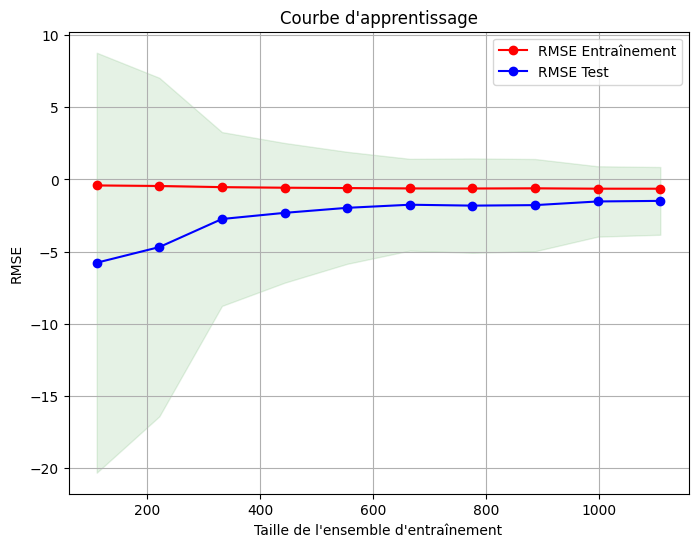

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve


model = LinearRegression()
plot_learning_curve(model,X_CE_train, y_CE_train)
plt.show()

- Réglage des hyperparamètres

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
elastic_net_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [seed]
}

elastic_net = linear_model.ElasticNet()
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, scoring='neg_mean_squared_error', cv=5)
elastic_net_grid.fit(X_CE_train, y_CE_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'l1_ratio': [0.001, 0.01, 0.1],
                         'max_iter': [1000, 2000, 3000], 'random_state': [42],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

- Random Forest

In [29]:
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestRegressor(random_state=seed)
random_forest_grid = GridSearchCV(random_forest, random_forest_params, scoring='neg_mean_squared_error', cv=5)
random_forest_grid.fit(X_CE_train, y_CE_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

- Svr

In [30]:
from sklearn.model_selection import RandomizedSearchCV

svr_params = {
    'C': np.logspace(-3, 0, 3),
    'kernel': ['linear', 'rbf']
}

svr = SVR()
svr_random = RandomizedSearchCV(svr, svr_params, scoring='neg_mean_squared_error', cv=5, n_iter=2)
svr_random.fit(X_CE_train[:100], y_CE_train[:100])

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=2,
                   param_distributions={'C': array([0.001     , 0.03162278, 1.        ]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error')

- Lgbm

In [31]:
lgbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10]
}

lgbm = lgb.LGBMRegressor()
lgbm_grid = GridSearchCV(lgbm, lgbm_params, scoring='neg_mean_squared_error', cv=5)
lgbm_grid.fit(X_CE_train, y_CE_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 987, number of used features: 23
[LightGBM] [Info] Start training from score 14.959686
[LightGBM] [Warning] No further splits with positive

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [32]:
# Affichage des meilleurs paramètres
print("Meilleurs paramètres pour ElasticNet:", elastic_net_grid.best_params_)
print("Meilleurs paramètres pour RandomForest:", random_forest_grid.best_params_)
print("Meilleurs paramètres pour SVR:", svr_random.best_params_)
print("Meilleurs paramètres pour LGBM:", lgbm_grid.best_params_)

Meilleurs paramètres pour ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.001, 'max_iter': 3000, 'random_state': 42, 'tol': 0.0001}
Meilleurs paramètres pour RandomForest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Meilleurs paramètres pour SVR: {'kernel': 'rbf', 'C': 1.0}
Meilleurs paramètres pour LGBM: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [33]:
def train_with_best_params(model, best_params, X_train, y_train):
    """
    Entraîne le modèle avec ses meilleurs paramètres sur les données d'entraînement.

    Parameters:
    - model: Le modèle à entraîner.
    - best_params: Les meilleurs paramètres à utiliser.
    - X_train: Les caractéristiques des données d'entraînement.
    - y_train: Les étiquettes des données d'entraînement.

    Returns:
    - fit_time: Le temps d'entraînement.
    - duration: La durée totale de l'opération.
    """
    model.set_params(**best_params)  # Appliquer les meilleurs paramètres
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time
    return fit_time, fit_time

In [34]:
def evaluate_model(model, X_test, y_test):
    """
    Évalue les performances du modèle sur l'ensemble de test.

    Parameters:
    - model: Le modèle à évaluer.
    - X_test: Les caractéristiques des données de test.
    - y_test: Les étiquettes des données de test.

    Returns:
    - r2: Le coefficient de détermination.
    - rmse: La racine de l'erreur quadratique moyenne.
    - mae: L'erreur absolue moyenne.
    """
    y_pred = model.predict(X_test)

    r2 = model.score(X_test, y_test)
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    mae = np.mean(np.abs(y_pred - y_test))

    return r2, rmse, mae

In [35]:
# Entraînement des modèles avec les meilleurs paramètres
best_elastic_net = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=seed)
best_elastic_net.fit(X_CE_train, y_CE_train)

best_random_forest = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=seed)
best_random_forest.fit(X_CE_train, y_CE_train)

best_svr = SVR(kernel='rbf', C=0.03162277660168379)
best_svr.fit(X_CE_train, y_CE_train)

best_lgbm = lgb.LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)
best_lgbm.fit(X_CE_train, y_CE_train)

# Évaluation des modèles sur les données de test
results = pd.DataFrame()

for name, model in [("ElasticNet", best_elastic_net), ("RandomForest", best_random_forest),
                    ("SVR", best_svr), ("LGBM", best_lgbm)]:
    r2, rmse, mae = evaluate_model(model, X_CE_test, y_CE_test)
    fit_time, duration = timer(train_with_best_params)(model, model.get_params(), X_CE_train, y_CE_train)

    df_dico = {
        'Modèle': [name],
        'Fit time': [fit_time],
        'Durée': [duration],
        'Test R2': [r2],
        'Train R2': [model.score(X_CE_train, y_CE_train)],
        'Test RMSE': [rmse],
        'Test MAE': [mae],
        'Train RMSE': [np.sqrt(np.mean((model.predict(X_CE_train) - y_CE_train) ** 2))],
        'Train MAE': [np.mean(np.abs(model.predict(X_CE_train) - y_CE_train))]
    }
    df_results = pd.DataFrame(df_dico)
    results = pd.concat([results, df_results], ignore_index=True)

results.style.hide_index()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 1233, number of used features: 23
[LightGBM] [Info] Start training from score 14.959365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Modèle,Fit time,Durée,Test R2,Train R2,Test RMSE,Test MAE,Train RMSE,Train MAE
ElasticNet,0.005098,0.005098,0.522790,0.542310,0.911986,0.702219,0.887392,0.686073
RandomForest,2.039333,2.039333,0.693748,0.927444,0.730588,0.529870,0.353319,0.258778
SVR,0.148967,0.148967,0.217621,0.194702,1.167728,0.892065,1.177087,0.904660
LGBM,0.294792,0.294792,0.702768,0.969796,0.719749,0.520069,0.227962,0.163424


**Random Forest pour la prédiction de la cosommation totale energetique Test R2 = 0.693748, Test RMSE 0.73**

In [36]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.5 MB/s eta 0:00:00


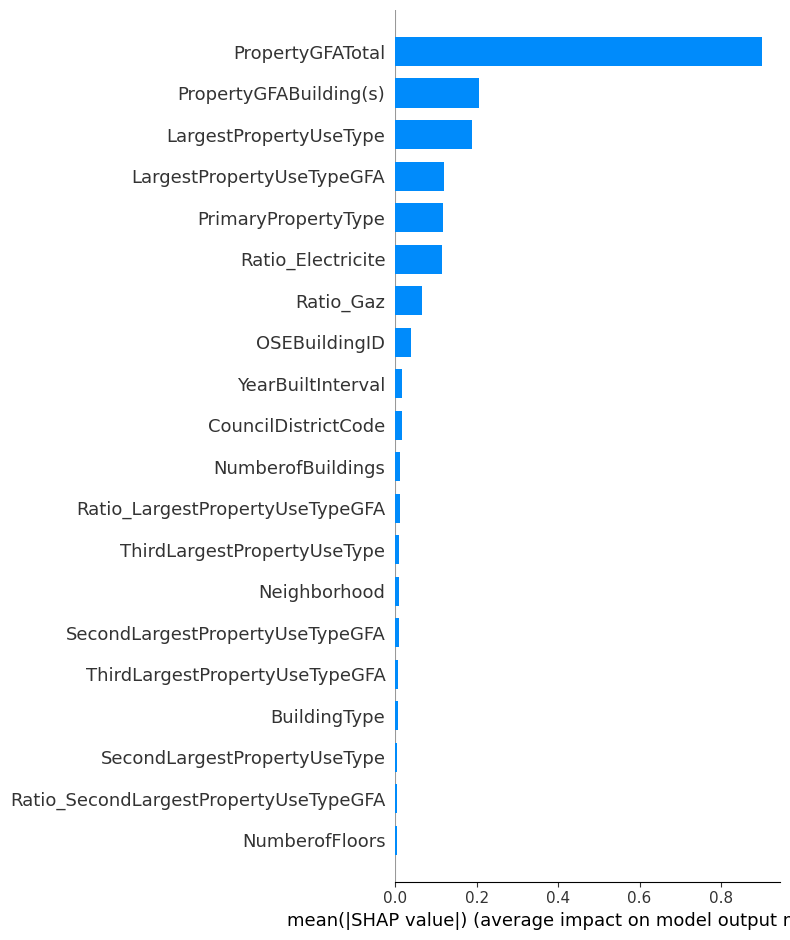

In [37]:
import shap
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Création un objet explainer SHAP pour le modèle RandomForest
explainer_rf = shap.TreeExplainer(best_random_forest)

# Calcule des valeurs SHAP pour un échantillon d'observations
sample = X_CE_train.sample(5)
shap_values_rf = explainer_rf.shap_values(sample)

# Affichage le plot Waterfall SHAP pour le modèle RandomForest
shap.summary_plot(shap_values_rf, sample, feature_names=X_CE_train.columns, plot_type="bar", title="RandomForest SHAP Values")

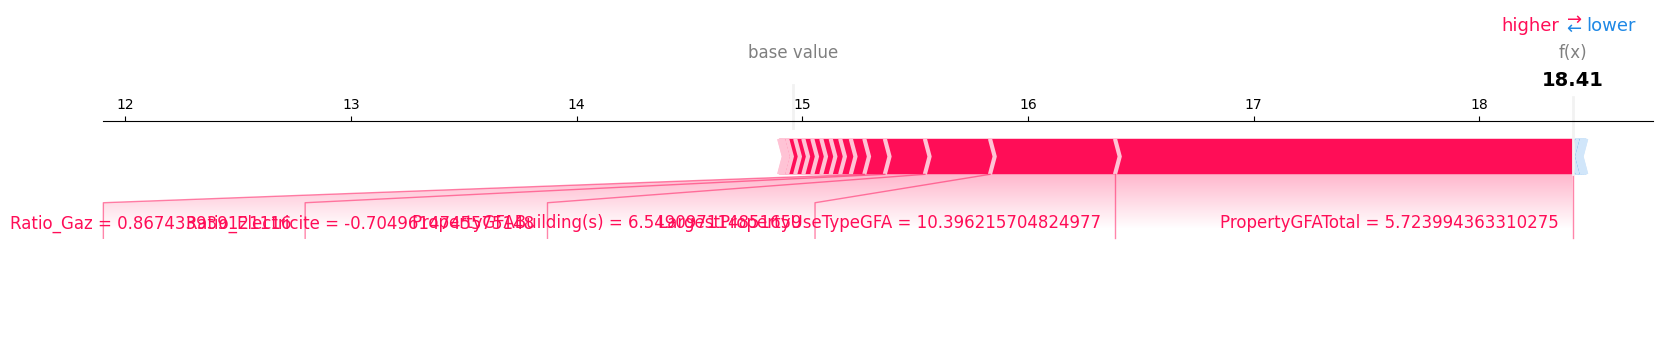

In [38]:
import shap
import matplotlib.pyplot as plt

# Initialisation de l'explainer SHAP avec le modèle
explainer = shap.TreeExplainer(best_random_forest)

# Calcule des valeurs SHAP pour une observation spécifique (par exemple, la première observation)
shap_values = explainer.shap_values(X_CE_test.iloc[0, :])

# Affichage du diagramme Waterfall SHAP pour l'observation spécifique
shap.force_plot(explainer.expected_value, shap_values, X_CE_test.iloc[0, :], matplotlib=True)
plt.show()

Modelisation des émissions de CO2

In [39]:
baseline_co2 = compare_resultat(X_Co2_train, y_Co2_train)
baseline_co2

Durée d'exécution de regression: 0.43987178802490234 secondes
Durée d'exécution de regression: 0.4393196105957031 secondes
Durée d'exécution de regression: 25.37481951713562 secondes
Durée d'exécution de regression: 4.355297803878784 secondes
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2586
[LightGBM] [Info] Number of data points in the train set: 1109, number of used features: 23
[LightGBM] [Info] Start training from score 4.035367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2592
[LightGBM] [Info] Number of data points in the train set: 1109, number of used features: 23


modèle,Fit time,Durée,Test R2,Train R2,Test RMSE,Test MAE,Train RMSE,Train MAE
linear_regression,0.021493,0.010647,0.232831,0.683060,1.278046,0.688212,0.818994,0.642612
elastic net,0.019424,0.006454,0.072960,0.175280,1.397844,1.061367,1.321120,1.045379
random_forest,2.438614,0.029648,0.798543,0.972080,0.651304,0.486707,0.243067,0.180708
svr,0.165455,0.027397,0.102845,0.119414,1.374373,1.073556,1.365136,1.057790
LGBM,0.571629,0.014024,0.810423,0.973498,0.631693,0.474363,0.236826,0.170323


**Réglage de paramètres (Tunning de paramètres)**

- Elastic Net


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Définition des hyperparamètres à ajuster
El_co2_parameters = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [seed]
}

# Initialisation du modèle ElasticNet
el_co2_model = ElasticNet()

# Application de la recherche sur grille des hyperparamètres
El_co2_grid = GridSearchCV(el_co2_model, El_co2_parameters, scoring='neg_mean_squared_error', cv=5)
El_co2_grid.fit(X_Co2_train, y_Co2_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [1000, 2000, 3000], 'random_state': [42],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

- Random_Forest

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Définition des hyperparamètres à ajuster
rf_co2_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [seed]
}

# Initialisation du modèle RandomForestRegressor
rf_co2_model = RandomForestRegressor()

# Application de la recherche sur grille des hyperparamètres
rf_co2_grid = GridSearchCV(rf_co2_model, rf_co2_parameters, scoring='neg_mean_squared_error', cv=5)
rf_co2_grid.fit(X_Co2_train, y_Co2_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='neg_mean_squared_error')

- svr

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import numpy as np

# Hyperparamètres à ajuster
svr_co2_params = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf'],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
    'gamma': ['scale', 'auto']
}

svr_co2_model = SVR()

# Recherche aléatoire avec un nombre limité d'itérations
svr_co2_random = RandomizedSearchCV(svr_co2_model, svr_co2_params, scoring='neg_mean_squared_error', cv=5, n_iter=5)
svr_co2_random.fit(X_Co2_train[:100], y_Co2_train[:100])  # Utiliser un sous-ensemble pour le réglage initial

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error')

- Light GBM

In [43]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Hyperparamètres à ajuster
lgb_co2_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10],
    'random_state': [seed]
}

# Initialisation le modèle LGBMRegressor
lgb_co2_model = lgb.LGBMRegressor()

# Recherche sur grille des hyperparamètres
lgb_co2_grid = GridSearchCV(lgb_co2_model, lgb_co2_params, scoring='neg_mean_squared_error', cv=5)
lgb_co2_grid.fit(X_Co2_train, y_Co2_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             scoring='neg_mean_squared_error')

In [44]:
# Affichage des meilleurs paramètres
print("Meilleurs paramètres pour ElasticNet (CO2):", El_co2_grid.best_params_)
print("Meilleurs paramètres pour RandomForest (CO2):", rf_co2_grid.best_params_)
print("Meilleurs paramètres pour LGBM (CO2):", lgb_co2_grid.best_params_)
print("Meilleurs paramètres pour SVR (CO2):", svr_co2_random.best_params_)

Meilleurs paramètres pour ElasticNet (CO2): {'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 1000, 'random_state': 42, 'tol': 0.001}
Meilleurs paramètres pour RandomForest (CO2): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Meilleurs paramètres pour LGBM (CO2): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}
Meilleurs paramètres pour SVR (CO2): {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 1, 'C': 1.0}


In [45]:
# Entraînement d'ElasticNet avec les meilleurs paramètres
best_elastic_net_co2 = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=1000, tol=1e-4, random_state=seed)
best_elastic_net_co2.fit(X_Co2_train, y_Co2_train)

# Entraînement de RandomForest avec les meilleurs paramètres
best_random_forest_co2 = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=seed)
best_random_forest_co2.fit(X_Co2_train, y_Co2_train)

# Entraînement de LGBM avec les meilleurs paramètres
best_lgbm_co2 = lgb.LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)
best_lgbm_co2.fit(X_Co2_train, y_Co2_train)

# Entraînement de SVR avec les meilleurs paramètres
best_svr_co2 = SVR(kernel='rbf', C=0.03162277660168379)
best_svr_co2.fit(X_Co2_train, y_Co2_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 1233, number of used features: 23
[LightGBM] [Info] Start training from score 4.046965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

SVR(C=0.03162277660168379)

In [46]:
# Entraînement des modèles avec les meilleurs paramètres pour Co2
best_elastic_net_co2 = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=seed)
best_elastic_net_co2.fit(X_Co2_train, y_Co2_train)

best_random_forest_co2 = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200, random_state=seed)
best_random_forest_co2.fit(X_Co2_train, y_Co2_train)

best_svr_co2 = SVR(kernel='rbf', C=0.03162277660168379)
best_svr_co2.fit(X_Co2_train, y_Co2_train)

best_lgbm_co2 = lgb.LGBMRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)
best_lgbm_co2.fit(X_Co2_train, y_Co2_train)

# Évaluation des modèles sur les données de test pour Co2
results_co2 = pd.DataFrame()

for name, model in [("ElasticNet", best_elastic_net_co2), ("RandomForest", best_random_forest_co2),
                    ("SVR", best_svr_co2), ("LGBM", best_lgbm_co2)]:
    r2, rmse, mae = evaluate_model(model, X_Co2_test, y_Co2_test)
    fit_time, duration = timer(train_with_best_params)(model, model.get_params(), X_Co2_train, y_Co2_train)

    df_dico = {
        'Modèle': [name],
        'Fit time': [fit_time],
        'Durée': [duration],
        'Test R2': [r2],
        'Train R2': [model.score(X_Co2_train, y_Co2_train)],
        'Test RMSE': [rmse],
        'Test MAE': [mae],
        'Train RMSE': [np.sqrt(np.mean((model.predict(X_Co2_train) - y_Co2_train) ** 2))],
        'Train MAE': [np.mean(np.abs(model.predict(X_Co2_train) - y_Co2_train))]
    }
    df_results = pd.DataFrame(df_dico)
    results_co2 = pd.concat([results_co2, df_results], ignore_index=True)

results_co2.style.hide_index()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 1233, number of used features: 23
[LightGBM] [Info] Start training from score 4.046965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

Modèle,Fit time,Durée,Test R2,Train R2,Test RMSE,Test MAE,Train RMSE,Train MAE
ElasticNet,0.010205,0.010205,0.608945,0.604599,0.911181,0.705130,0.914793,0.711805
RandomForest,2.663436,2.663436,0.763659,0.944603,0.708362,0.517432,0.342409,0.251243
SVR,0.154835,0.154835,0.098250,0.090909,1.383658,1.070338,1.387099,1.090877
LGBM,0.307897,0.307897,0.770883,0.980351,0.697452,0.519329,0.203927,0.148783


**Commentaire : RandomForest pour la prédiction de Co2 avec un RMSE test de 0.71 et R2 test de 0.76 et un temps 1.95**

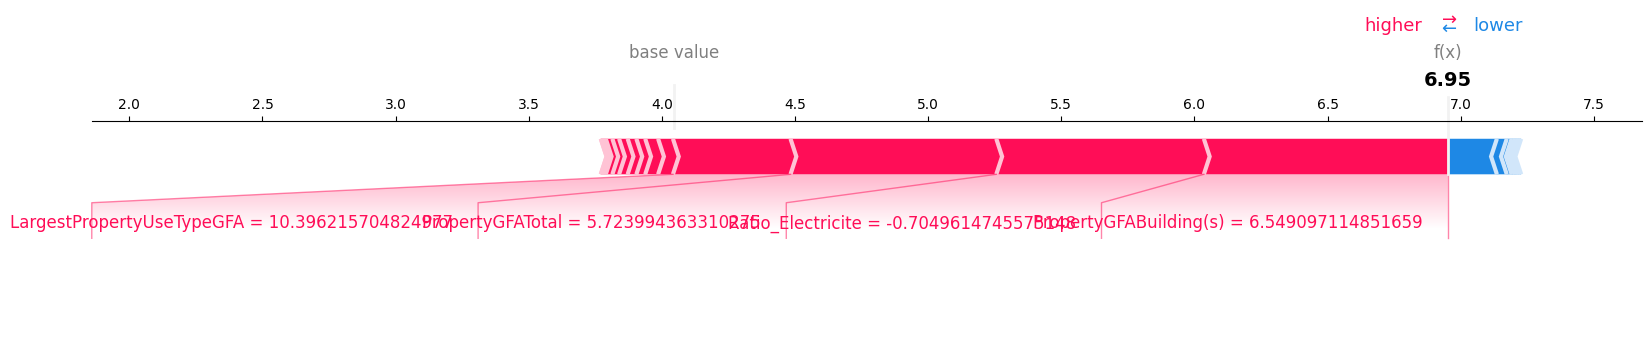

In [47]:
import shap
import matplotlib.pyplot as plt

explainer_rf_co2 = shap.TreeExplainer(best_random_forest_co2)

shap_values_rf_co2 = explainer_rf_co2.shap_values(X_Co2_test.iloc[0, :])

# diagramme Waterfall SHAP pour l'observation spécifique
shap.force_plot(explainer_rf_co2.expected_value, shap_values_rf_co2, X_Co2_test.iloc[0, :], matplotlib=True)

plt.show()

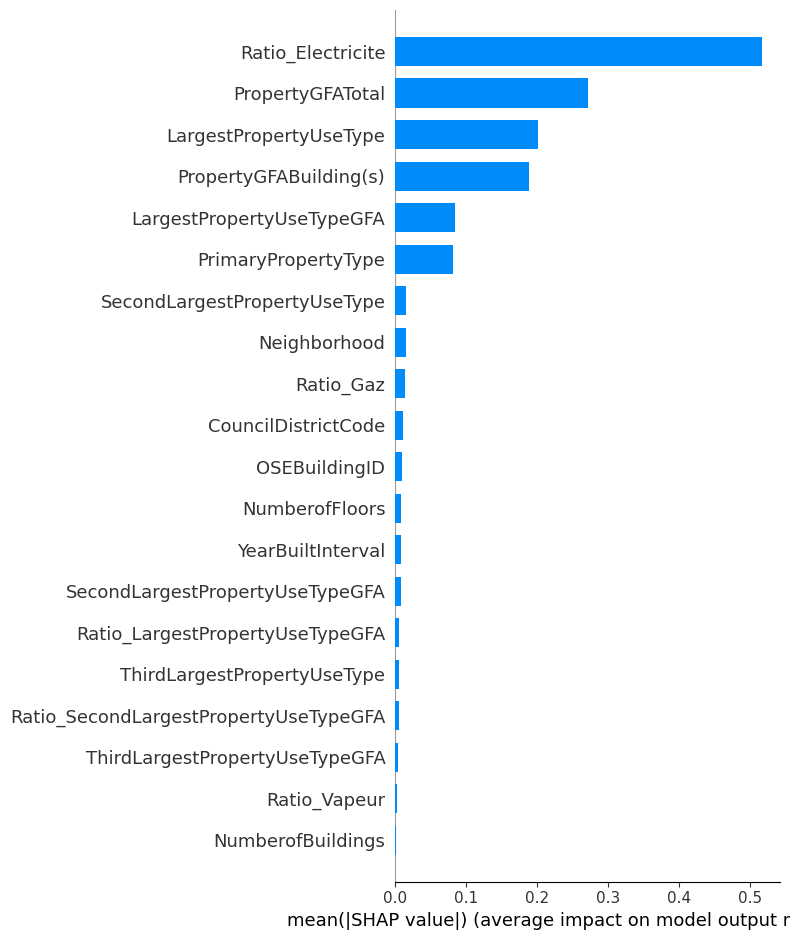

In [48]:
import shap
import pandas as pd

# Objet explainer SHAP pour le modèle RandomForest de Co2
explainer_rf_co2 = shap.TreeExplainer(best_random_forest_co2)

# Valeurs SHAP pour un échantillon d'observations de Co2
sample_co2 = X_Co2_train.sample(5)
shap_values_rf_co2 = explainer_rf_co2.shap_values(sample_co2)

# plot Waterfall SHAP pour le modèle RandomForest de Co2
shap.summary_plot(shap_values_rf_co2, sample_co2, feature_names=X_Co2_train.columns, plot_type="bar", title="RandomForest SHAP Values (Co2)")

- Choix du Modele


In [49]:
# Meilleur modèle pour CE
best_model_ce = results.loc[results['Test RMSE'].idxmin()]

# Meilleur modèle pour Co2
best_model_co2 = results_co2.loc[results_co2['Test RMSE'].idxmin()]

summary_df = pd.DataFrame({
    'Modèle': ['CE', 'Co2'],
    'Meilleur modèle': [best_model_ce['Modèle'], best_model_co2['Modèle']],
    'Test R2': [best_model_ce['Test R2'], best_model_co2['Test R2']],
    'Test RMSE': [best_model_ce['Test RMSE'], best_model_co2['Test RMSE']]
})

summary_df

,Modèle,Meilleur modèle,Test R2,Test RMSE
0,CE,LGBM,0.702768,0.719749
1,Co2,LGBM,0.770883,0.697452



**Commentaire pour la prédiction du Co2 et de CE**

Les modèles de prédiction pour la consommation totale d'énergie et les émissions de gaz à effet de serre révèlent des caractéristiques clés. Pour la consommation totale d'énergie, la conformité aux normes et la taille du bâtiment sont prédominantes, tandis que pour les émissions de CO2, le ratio d'électricité et la taille du bâtiment jouent des rôles cruciaux. Ces insights permettent une orientation stratégique pour des actions visant à améliorer l'efficacité énergétique et réduire l'empreinte carbone des bâtiments.

** **

In [50]:
# Modèle optimal pour CO2
Rf_co2_optimal = rf_co2_grid.best_estimator_

Rf_CE_optimal = random_forest_grid.best_estimator_  # Assurez-vous que c'est le même objet que celui que vous avez utilisé dans la recherche sur grille

print("Modèle optimal pour CO2 :")
print(Rf_co2_optimal)

print("Modèle optimal pour Site Energy Use :")
print(Rf_CE_optimal)

print("Modèle que vous avez mentionné :")
print(RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2', min_samples_leaf=2, min_samples_split=5))

Modèle optimal pour CO2 :
RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                      random_state=42)
Modèle optimal pour Site Energy Use :
RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)
Modèle que vous avez mentionné :
RandomForestRegressor(bootstrap=False, max_depth=25, max_features='log2',
                      min_samples_leaf=2, min_samples_split=5)


In [51]:
pip install shap

- Analyse des prédictions

In [52]:
# Création d'un dataframe des prédictions avec la tranformation log ou non.
y_CE_pred = Rf_CE_optimal.predict(X_CE_test)

prediction_CE = pd.DataFrame([y_CE_test,pd.Series(y_CE_pred, index = y_CE_test.index),
                              (10**y_CE_test)-1,
                               (10**pd.Series(y_CE_pred, index = y_CE_test.index))-1]).T
prediction_CE.columns = ["y_log","y_predict_log", "y", "y_predict"]

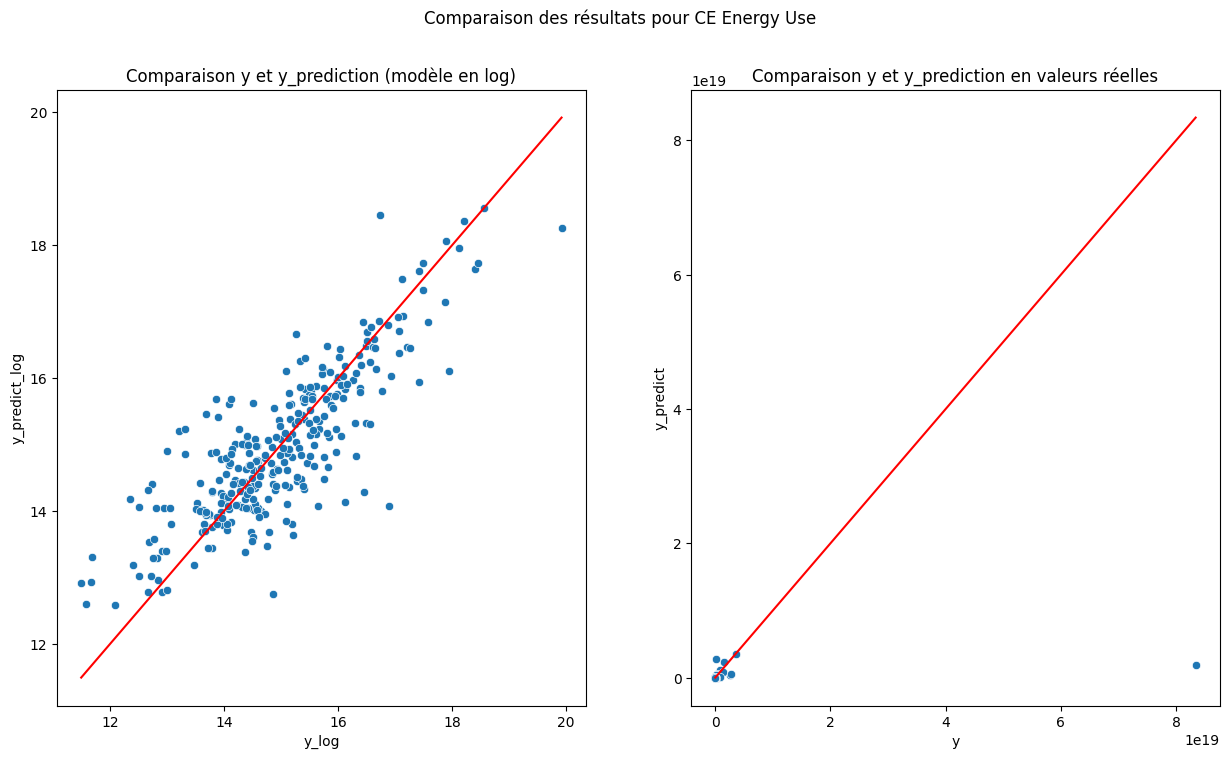

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

# Premier graphique
X_plot = [prediction_CE['y_log'].min(), prediction_CE['y_log'].max()]
ax1.plot(X_plot, X_plot, color="red")
sns.scatterplot(x=prediction_CE['y_log'], y=prediction_CE['y_predict_log'], ax=ax1)

# Deuxième graphique
X_plot = [prediction_CE['y'].min(), prediction_CE['y'].max()]
ax2.plot(X_plot, X_plot, color="red")
sns.scatterplot(x=prediction_CE['y'], y=prediction_CE['y_predict'], ax=ax2)

#ax3 = plt.axes([0.6, 0.6, 0.2, 0.2])
X_plot = [prediction_CE['y'].min(), prediction_CE['y'].max()]


ax1.set_title('Comparaison y et y_prediction (modèle en log)')
ax2.set_title('Comparaison y et y_prediction en valeurs réelles')
fig.suptitle('Comparaison des résultats pour CE Energy Use')
plt.show()

In [54]:
# Création d'un dataframe des prédiction avec la tranformation log ou non.
y_Co2_pred = Rf_co2_optimal.predict(X_Co2_test)

prediction_Co2 = pd.DataFrame([y_Co2_test,pd.Series(y_Co2_pred, index = y_Co2_test.index),
                              (10**y_Co2_test)-1,
                               (10**pd.Series(y_Co2_pred, index = y_Co2_test.index))-1]).T
prediction_Co2.columns = ["y_log","y_predict_log", "y", "y_predict"]

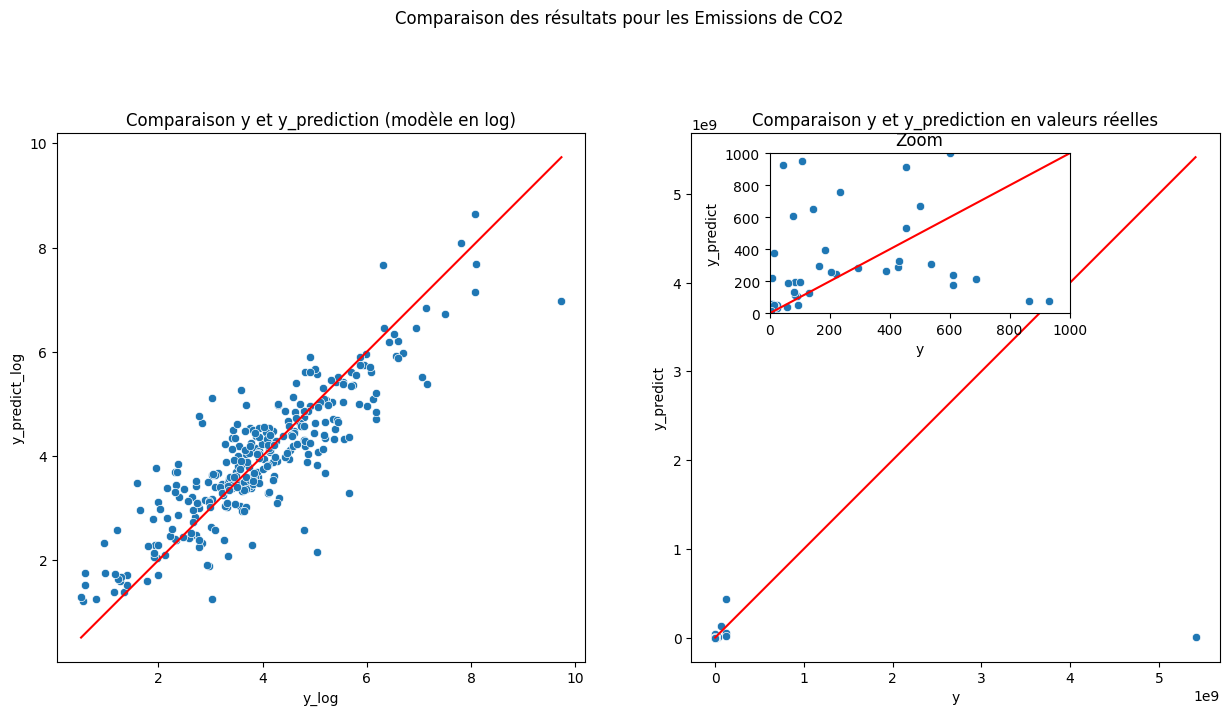

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=False)

X_plot = [prediction_Co2['y_log'].min(), prediction_Co2['y_log'].max()]
ax1.plot(X_plot, X_plot, color="red")
sns.scatterplot(x=prediction_Co2['y_log'], y=prediction_Co2['y_predict_log'], ax=ax1)

X_plot = [prediction_Co2['y'].min(), prediction_Co2['y'].max()]
ax2.plot(X_plot, X_plot, color="red")
sns.scatterplot(x=prediction_Co2['y'], y=prediction_Co2['y_predict'], ax=ax2)

ax3 = plt.axes([0.6, 0.6, 0.2, 0.2])
X_plot = [prediction_Co2['y'].min(), prediction_Co2['y'].max()]
ax3.plot(X_plot, X_plot, color="red")
sns.scatterplot(x=prediction_Co2['y'], y=prediction_Co2['y_predict'], ax=ax3)
ax3.set_title('Zoom')
ax3.set_xlim([0.0, 1000])
ax3.set_ylim([0.0, 1000])
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')

ax1.set_title('Comparaison y et y_prediction (modèle en log)')
ax2.set_title('Comparaison y et y_prediction en valeurs réelles')
fig.suptitle('Comparaison des résultats pour les Emissions de CO2')

plt.show()

Interet de ENERGYSTARScore                          

In [56]:
# Affichage des features importance
def affic_features_impotance_model(model,  X_test, name):

    feat_imp = model.feature_importances_
    df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
    df_featimp["Feature Name"] = X_test.columns
    df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=True)
    display(df_featimp)

    # Affichage Features importance
    plt.figure(figsize=(10,7))
    #df_featimp.plot.bar(x= "Feature Importance", y = "Feature Name", title =f"Feature importance pour le modele {name} ")
    #plt.barh(X_test.columns, feat_imp)
    plt.barh(df_featimp["Feature Name"], df_featimp["Feature Importance"])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature importance pour le modele {name} ")
    plt.show()

    return None

In [57]:
data_MLE = data.dropna(subset = "ENERGYSTARScore")

In [58]:
cat_E = data_MLE.select_dtypes(exclude = "number").columns.tolist()
num_E = data_MLE.select_dtypes(include = "number").columns.tolist()

In [59]:
#Suppression des target

num_E.remove("SiteEnergyUse_log")
num_E.remove("TotalGHGEmissions_log")

In [60]:
seed = 42  # La même graine aléatoire pour la reproductibilité

# Target consommation totale en énergie
X_CEE_train = data_MLE[data_MLE['Set'] == 1].drop(columns=["SiteEnergyUse_log", "TotalGHGEmissions_log"])
y_CEE_train = data_MLE[data_MLE['Set'] == 1]["SiteEnergyUse_log"]
X_CEE_test = data_MLE[data_MLE['Set'] == 0].drop(columns=["SiteEnergyUse_log", "TotalGHGEmissions_log"])
y_CEE_test = data_MLE[data_MLE['Set'] == 0]["SiteEnergyUse_log"]

# Target émissions de CO2
X_Co2E_train = data_MLE[data_MLE['Set'] == 1].drop(columns=["TotalGHGEmissions_log", "SiteEnergyUse_log"])
y_Co2E_train = data_MLE[data_MLE['Set'] == 1]["TotalGHGEmissions_log"]
X_Co2E_test = data_MLE[data_MLE['Set'] == 0].drop(columns=["TotalGHGEmissions_log", "SiteEnergyUse_log"])
y_Co2E_test = data_MLE[data_MLE['Set'] == 0]["TotalGHGEmissions_log"]

- Séparation en train et test set


- Standardisation et encodage

- Encodage

Pour X_CEE :


In [61]:
# Utilisation de fit_transform sur l'ensemble d'entraînement
X_CEE_train[categorical] = encoder.fit_transform(X_CEE_train[categorical], y_CEE_train)
# Utilisation de transform sur l'ensemble de test en utilisant le même encodeur
X_CEE_test[categorical] = encoder.transform(X_CEE_test[categorical], y_CEE_test)

Pour X_Co2E :

In [62]:
# Utilisation de fit_transform sur l'ensemble d'entraînement
X_Co2E_train[categorical] = encoder.fit_transform(X_Co2E_train[categorical], y_Co2E_train)
# Utilisation de transform sur l'ensemble de test en utilisant le même encodeur
X_Co2E_test[categorical] = encoder.transform(X_Co2E_test[categorical], y_Co2E_test)

- Standardisation

Pour X_CEE :


In [63]:
X_CEE_train[numerical] = scaler.fit_transform(X_CEE_train[numerical])

X_CEE_test[numerical] = scaler.transform(X_CEE_test[numerical])

Pour X_Co2E :

In [64]:
X_Co2E_train[numerical] = scaler.fit_transform(X_Co2E_train[numerical])

X_Co2E_test[numerical] = scaler.transform(X_Co2E_test[numerical])

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Définition de la fonction gridCV
def gridCV(model, params, X_train, y_train, cv):
    grid = GridSearchCV(model, params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

# Définition de la fonction resultats_grid
def resultats_grid(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    df_results = pd.DataFrame({
        'Modèle': [name],
        'Test R2': [r2],
        'Test RMSE': [rmse],
        'Test MAE': [mae],
        'Test MSE': [mse]
    })

    return df_results

- Entrainement et cross validation

In [66]:
# Définition des paramètres random pour la recherche sur grille

random_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [67]:
# Entraînement du modèle RF pour Co2 avec ENERGYSTARScore
rf_co2_ES = gridCV(RandomForestRegressor(), random_parameters, X_Co2E_train, y_Co2E_train, 5)
rf_res_ES = resultats_grid(rf_co2_ES, "RF_ES_Co2", X_Co2E_test, y_Co2E_test)

In [68]:
# Entraînement du modèle RF pour SEU avec ENERGYSTARScore
rf_ES = gridCV(RandomForestRegressor(), random_parameters, X_CEE_train, y_CEE_train, 5)
rf_result = resultats_grid(rf_ES, "RF_ES_SEU", X_CEE_test, y_CEE_test)
res_ES = pd.concat([rf_res_ES, rf_result], ignore_index=True)

In [69]:
# Suppression de la colonne ENERGYSTARScore
X_CEES_train = X_CEE_train.drop(['ENERGYSTARScore'], axis=1)
X_CEES_test = X_CEE_test.drop(['ENERGYSTARScore'], axis=1)

# Suppression de la colonne ENERGYSTARScore pour Co2
X_Co2ES_train = X_Co2E_train.drop(['ENERGYSTARScore'], axis=1)
X_Co2ES_test = X_Co2E_test.drop(['ENERGYSTARScore'], axis=1)

In [70]:
# Entraînement du modèle RF pour Co2 sans ENERGYSTARScore
rf_co2_ES_total = gridCV(RandomForestRegressor(), random_parameters, X_Co2ES_train, y_Co2E_train, 5)
rf_res_ES_total = resultats_grid(rf_co2_ES_total, "RF_ES_Co2 sans ES", X_Co2ES_test, y_Co2E_test)
res_ES = pd.concat([res_ES, rf_res_ES_total], ignore_index=True)

# Entraînement du modèle RF pour SEU sans ENERGYSTARScore
rf_ES_total = gridCV(RandomForestRegressor(), random_parameters, X_CEES_train, y_CEE_train, 5)
rf_result_total = resultats_grid(rf_ES_total, "RF_ES_SEU sans ES", X_CEES_test, y_CEE_test)
res_ES = pd.concat([res_ES, rf_result_total], ignore_index=True)

In [71]:
# Affichage du tableau de résultats
res_ES.style.hide_index()

Modèle,Test R2,Test RMSE,Test MAE,Test MSE
RF_ES_Co2,0.853769,0.545045,0.376420,0.297074
RF_ES_SEU,0.854737,0.487922,0.334885,0.238068
RF_ES_Co2 sans ES,0.803139,0.632401,0.436155,0.399931
RF_ES_SEU sans ES,0.766416,0.618720,0.428629,0.382814


In [72]:
import plotly.express as px
import pandas as pd

# Données à partir de res_ES.style.hide_index()
data = {
    'Modèle': ['RF_ES_Co2', 'RF_ES_Co2 sans ES', 'RF_ES_SEU','RF_ES_SEU sans ES'],
    'Test R2': [0.838433, 0.787477, 0.834754,	0.753072],
    'Test RMSE': [0.543518, 0.623363, 0.535875, 0.655063],
}

# Convertir les données en DataFrame
df = pd.DataFrame(data)

# Créer un diagramme en barres interactif avec Plotly Express
fig = px.bar(df, x='Modèle', y=['Test RMSE', 'Test R2'],
             labels={'value': 'Scores', 'variable': 'Métrique'},
             title='Comparaison des métriques de performance des modèles')

# Ajouter les valeurs à l'intérieur des barres
for trace in fig.data:
    trace.text = df[trace.name].astype(str)

# Afficher le diagramme interactif
fig.show()

- Features importances

In [73]:
rf_co2_ES_model = rf_co2_ES.best_estimator_
rf_site_ES_model = rf_ES.best_estimator_

In [74]:
def affic_features_importance_model(model, X, title):
    feature_importance = model.feature_importances_
    features = X.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print(f"\n{title}\n")
    print(importance_df)

# Utilisation de la fonction
affic_features_importance_model(rf_co2_ES_model, X_Co2E_test, 'RF_ES_Co2 avec Energy Star')
affic_features_importance_model(rf_site_ES_model, X_CEE_test, 'RF_ES_SEU avec Energy Star')
affic_features_importance_model(rf_co2_ES_total.best_estimator_, X_Co2ES_test, 'RF_ES_Co2 sans Energy Star')
affic_features_importance_model(rf_ES_total.best_estimator_, X_CEES_test, 'RF_ES_SEU sans Energy Star')


RF_ES_Co2 avec Energy Star

                                  Feature  Importance
2                     PrimaryPropertyType    0.280460
18                      Ratio_Electricite    0.248211
8                        PropertyGFATotal    0.108541
10                 PropertyGFABuilding(s)    0.087005
12              LargestPropertyUseTypeGFA    0.080391
17                        ENERGYSTARScore    0.053871
11                 LargestPropertyUseType    0.042245
0                           OSEBuildingID    0.022365
7                          NumberofFloors    0.015911
14        SecondLargestPropertyUseTypeGFA    0.009258
19                              Ratio_Gaz    0.009231
6                       NumberofBuildings    0.007163
22        Ratio_LargestPropertyUseTypeGFA    0.006216
4                            Neighborhood    0.005198
20                           Ratio_Vapeur    0.004431
3                     CouncilDistrictCode    0.004236
5                       YearBuiltInterval    0.003866

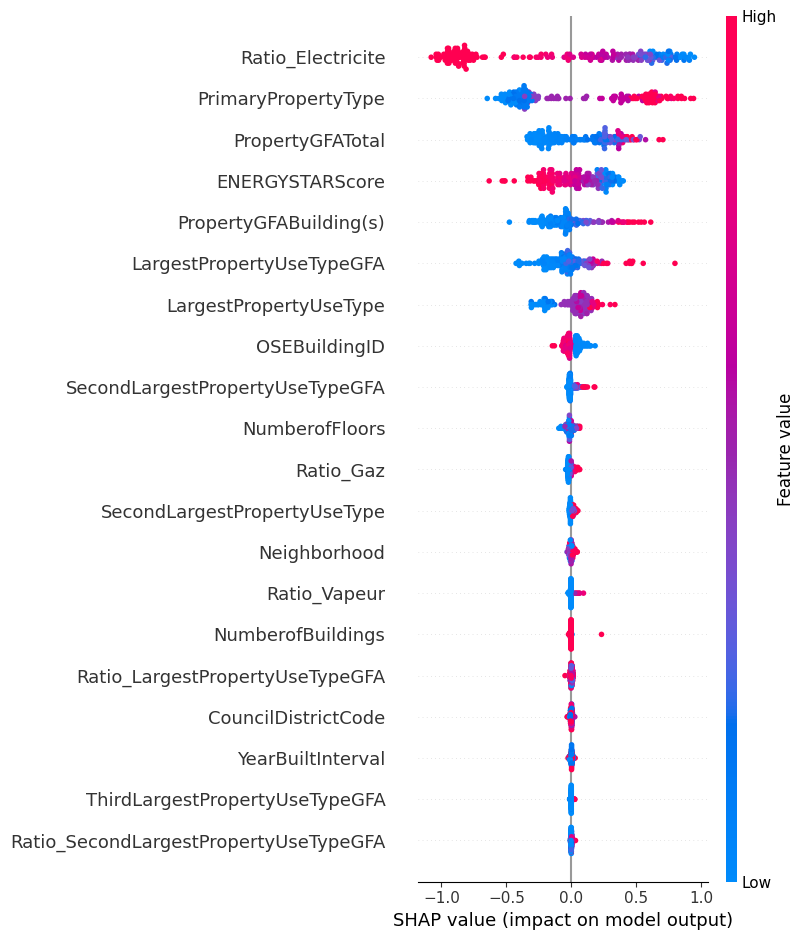

In [75]:
import shap
import pandas as pd

def affic_features_importance_model_shap(model, X, title):
    # Création d'objet explainer SHAP pour le modèle
    explainer = shap.TreeExplainer(model)

    # Calcule des valeurs SHAP pour toutes les observations dans l'ensemble de test
    shap_values = explainer.shap_values(X)

    # Affichage le summary_plot de SHAP
    shap.summary_plot(shap_values, X, feature_names=X.columns, title=title)

affic_features_importance_model_shap(rf_co2_ES_model, X_Co2E_test, "RF sur les émissions de CO2 avec Energy Star")

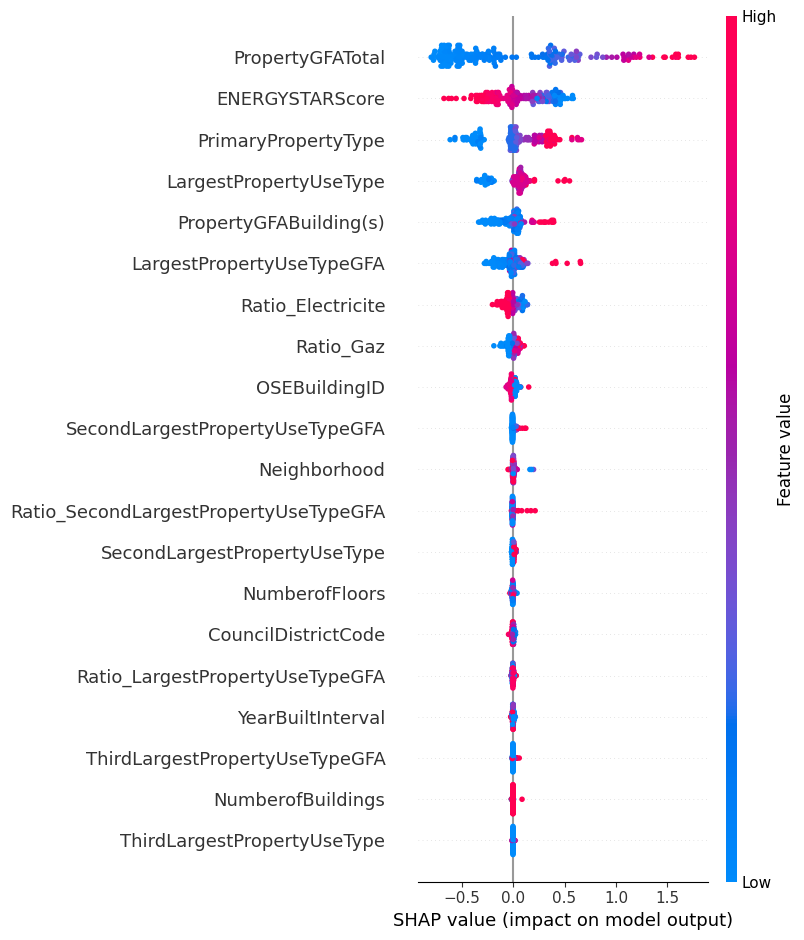

In [76]:
import shap
import pandas as pd

def affic_features_importance_model_shap(model, X, title):
    # Objet explainer SHAP pour le modèle
    explainer = shap.TreeExplainer(model)

    # Calcule des valeurs SHAP pour toutes les observations dans l'ensemble de test
    shap_values = explainer.shap_values(X)

    # Affichage le summary_plot de SHAP
    shap.summary_plot(shap_values, X, feature_names=X.columns, title=title)

affic_features_importance_model_shap(rf_site_ES_model, X_CEE_test, " RF sur la consommation d'énergie avec Energy Star ")

 **Observation : Les modèles Random Forest pour les émissions de CO2 et la consommation energetique (CE) avec et sans ENERGYSTARScore révèlent des caractéristiques clés. Avec ENERGYSTARScore, les modèles accordent une importance significative à Ratio_Electricite, PropertyGFATotal et ENERGYSTARScore. Sans ENERGYSTARScore, PropertyGFATotal reste crucial, soulignant la dépendance accrue aux autres caractéristiques. Pour les émissions de CO2, la présence d'ENERGYSTARScore est essentielle, tandis que pour l'efficacité énergétique, PropertyGFATotal joue un rôle central. Ces insights soulignent l'impact différencié des caractéristiques selon la présence d'ENERGYSTARScore.**